In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
import os
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from IPython.display import Image
from keras import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.layers import Dropout, GlobalMaxPooling2D, Dense, Flatten, GlobalAveragePooling2D
import tf_keras
from tensorflow.keras.callbacks import EarlyStopping
import os
#os.environ['TF_USE_LEGACY_KERAS'] = '1'
from tensorflow.keras.layers import Layer, Concatenate, Input

from sklearn.metrics import accuracy_score

from keras.models import Model
from keras.optimizers import SGD, Adam
tf.random.set_seed(1234)

## Load Data

In [2]:
%%capture
import zipfile
!unzip /content/CIFAKE.zip

In [3]:
dataset_dir = "train"
img_height = 32
img_width = 32
batch_size = 500

# Load training and validation data
train, val = keras.utils.image_dataset_from_directory(
  os.path.join(dataset_dir, ""),
  validation_split=0.2,
  subset="both",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = 500)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.
Using 20000 files for validation.


In [4]:
test = keras.utils.image_dataset_from_directory(
  os.path.join("test"),
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = 500)

Found 20000 files belonging to 2 classes.


In [5]:
train_list = list(train)
train_imgs = train_list[0][0].numpy()
train_labels = train_list[0][1].numpy()
norm_train_imgs = train_imgs/255.0
norm_train_imgs.shape

(500, 32, 32, 3)

In [6]:
val_list = list(val)
val_imgs = val_list[0][0].numpy()
val_labels = val_list[0][1].numpy()
norm_val_imgs = val_imgs/255.0
val_labels.shape

(500,)

In [7]:
test_list = list(test)
test_imgs = test_list[0][0].numpy()
test_labels = test_list[0][1].numpy()
norm_test_imgs = test_imgs/255.0
norm_test_imgs.shape

(500, 32, 32, 3)

## CNN

In [8]:
keras.backend.clear_session()

cnn_model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=1, activation="sigmoid")])

In [9]:
cnn_model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])
es = EarlyStopping(monitor="val_accuracy",
                   patience=10,
                   restore_best_weights=True,
                   verbose=1)

In [10]:
epochs = 80

history = cnn_model.fit(
  train,
  validation_data=val,
  epochs=epochs,
  verbose=3,
  callbacks=es)

history = pd.DataFrame(history.history)
pd.set_option("display.max_rows", 80)
display(history)

Epoch 1/80
Epoch 2/80
Epoch 3/80
Epoch 4/80
Epoch 5/80
Epoch 6/80
Epoch 7/80
Epoch 8/80
Epoch 9/80
Epoch 10/80
Epoch 11/80
Epoch 12/80
Epoch 13/80
Epoch 14/80
Epoch 15/80
Epoch 16/80
Epoch 17/80
Epoch 18/80
Epoch 19/80
Epoch 20/80
Epoch 21/80
Epoch 22/80
Epoch 23/80
Epoch 24/80
Epoch 25/80
Epoch 26/80
Epoch 27/80
Epoch 28/80
Epoch 29/80
Epoch 30/80
Epoch 31/80
Epoch 32/80
Epoch 33/80
Epoch 34/80
Epoch 35/80
Epoch 36/80
Epoch 37/80
Epoch 38/80
Epoch 39/80
Epoch 40/80
Epoch 41/80
Epoch 42/80
Epoch 43/80
Epoch 44/80
Epoch 45/80
Restoring model weights from the end of the best epoch: 35.
Epoch 45: early stopping


,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,0.485142,0.756550,0.770360,0.730749,0.326451,0.86820,0.874607,0.860110
1,0.299034,0.874800,0.867096,0.885182,0.254625,0.89885,0.932468,0.860310
2,0.245344,0.899650,0.895811,0.904414,0.217029,0.91385,0.905358,0.924613
3,0.217225,0.911462,0.909412,0.913893,0.199006,0.92120,0.933882,0.906840
4,0.205454,0.917313,0.914720,0.920370,0.173337,0.93435,0.926569,0.943684
5,0.198137,0.920575,0.918161,0.923396,0.181286,0.93050,0.954474,0.904343
6,0.179898,0.929462,0.927991,0.931124,0.171139,0.93205,0.940285,0.922916
7,0.170145,0.932400,0.931878,0.932950,0.142500,0.94570,0.942249,0.949775
8,0.168113,0.932913,0.931689,0.934275,0.142447,0.94675,0.960675,0.931802
9,0.159155,0.936787,0.936099,0.937527,0.144073,0.94460,0.936233,0.954368


## CNN Feature Map

In [ ]:
for layer in cnn_model.layers:

    if 'conv' not in layer.name:
        continue
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

conv2d (3, 3, 3, 64)
conv2d_1 (3, 3, 64, 128)
conv2d_2 (3, 3, 128, 256)


In [ ]:
filters , bias = cnn_model.layers[1].get_weights()

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

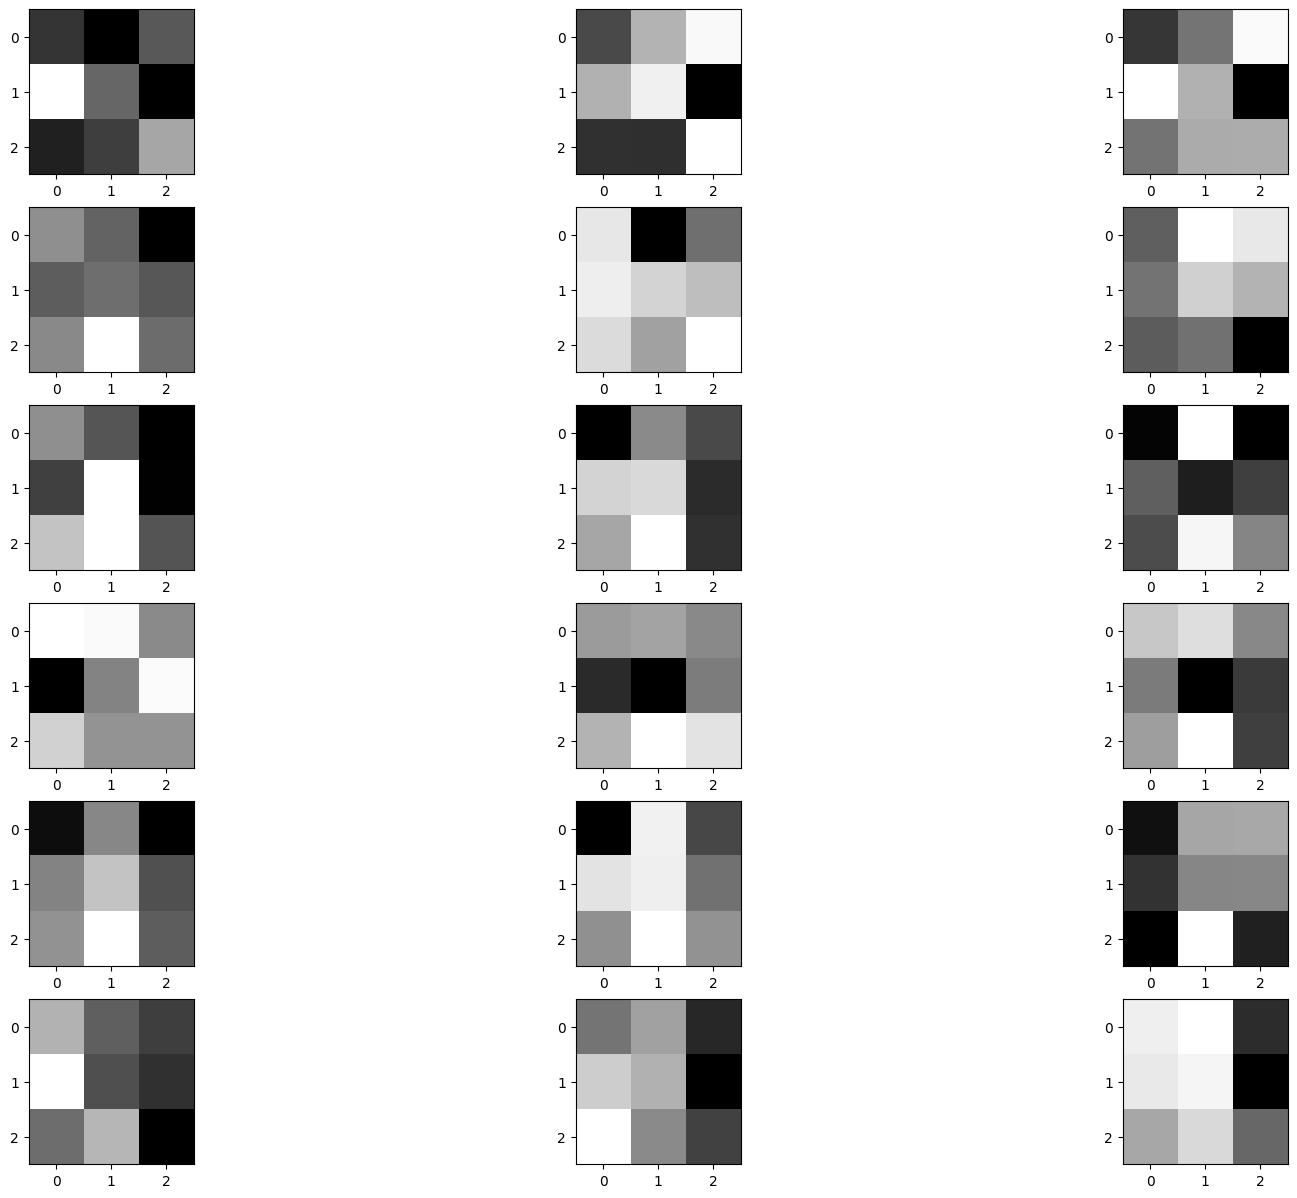

In [ ]:
n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

In [ ]:
modelmap = Model(inputs=cnn_model.inputs , outputs=cnn_model.layers[1].output)

In [ ]:
for i in range(len(cnn_model.layers)):
    layer = cnn_model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i , layer.name , layer.output.shape)

1 conv2d (None, 32, 32, 64)
4 conv2d_1 (None, 16, 16, 128)
7 conv2d_2 (None, 8, 8, 256)


In [ ]:
train.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
features = modelmap.predict(train.take(1))

features.shape

1/1 [==============================] - 0s 183ms/step


(500, 32, 32, 64)

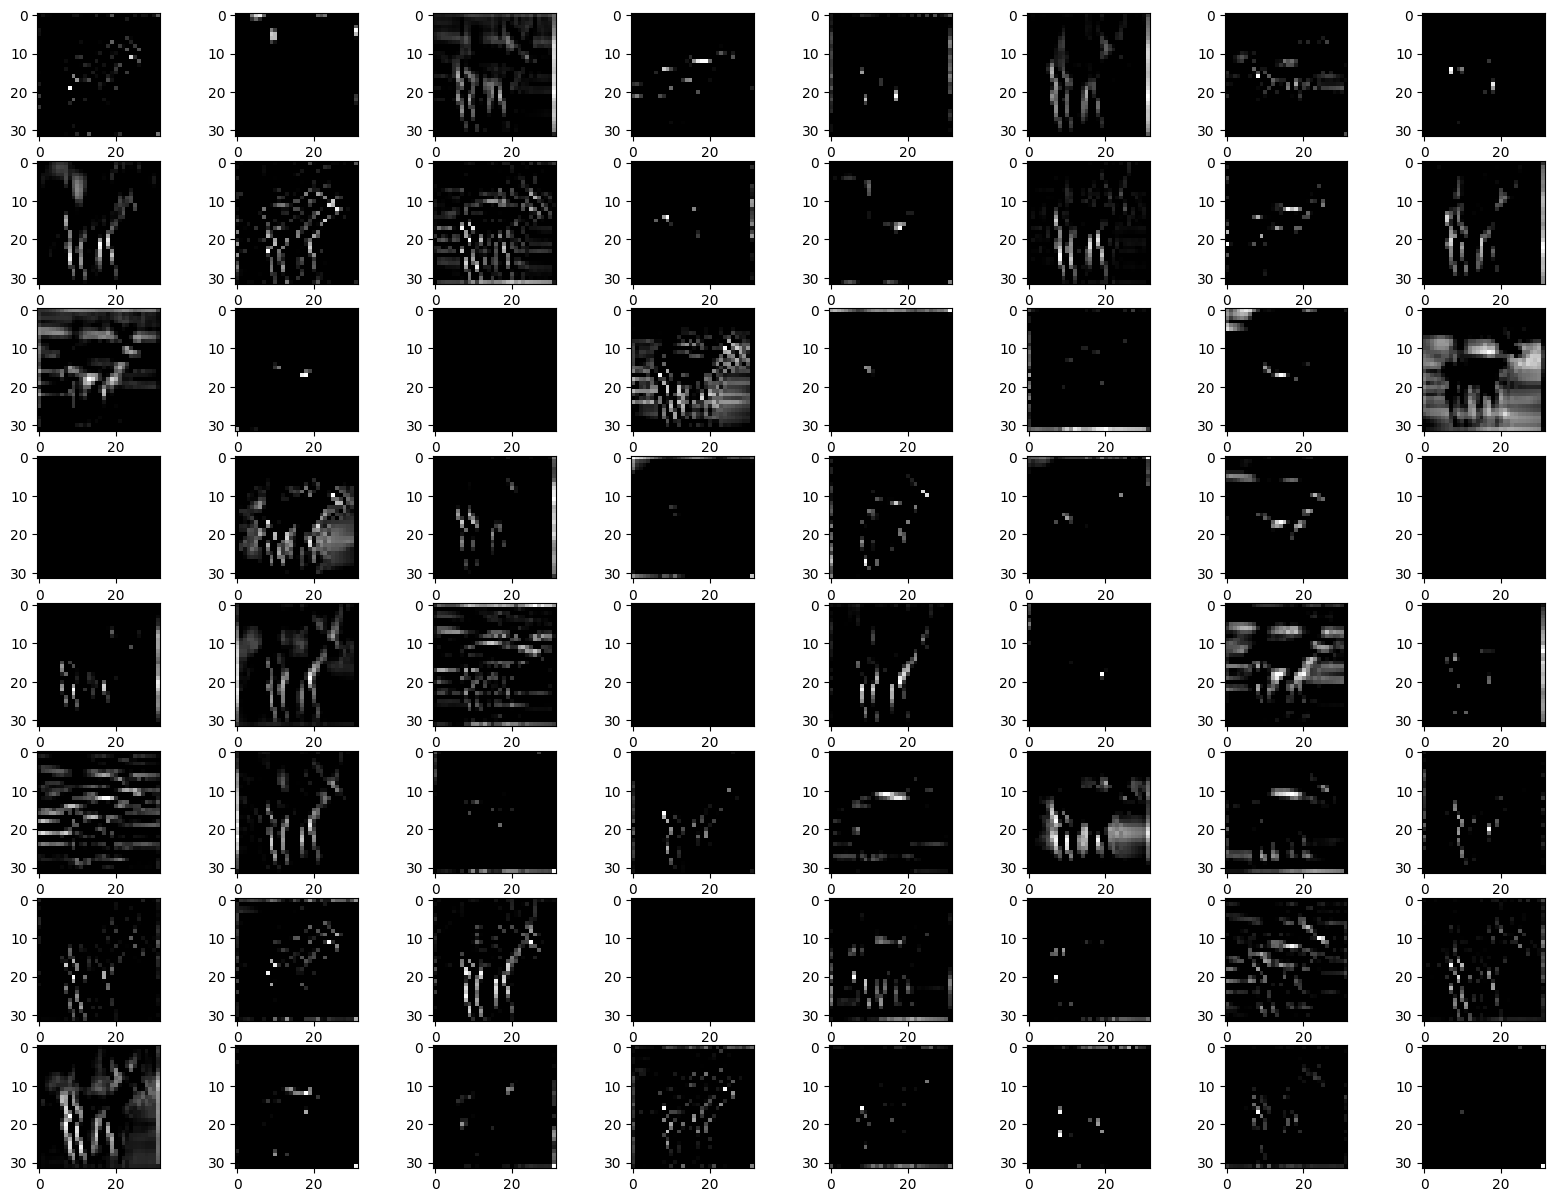

In [ ]:
fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')

plt.show()

In [ ]:
blocks = [1, 2]
outputs = [modelmap.layers[i].output for i in blocks]

model2 = Model(inputs= modelmap.inputs, outputs = outputs)

In [ ]:
feature_map = model2.predict(train.take(1))

len(feature_map[0][0][0][0])

1/1 [==============================] - 0s 135ms/step


3

IndexError: index 3 is out of bounds for axis 3 with size 3

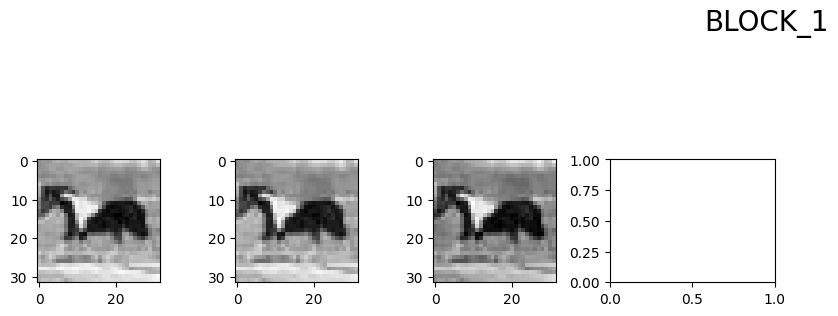

In [ ]:
for i,fmap in zip(blocks,feature_map):
    fig = plt.figure(figsize=(20,15))
    #https://stackoverflow.com/a/12444777
    fig.suptitle("BLOCK_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]):

        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')

plt.show()

## AlexNet Architecture

In [11]:
alex_model = Sequential([
    layers.Rescaling(1./255, input_shape=(32,32,3)),
    layers.Resizing(227,227),
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
alex_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 resizing (Resizing)         (None, 227, 227, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 256)      

In [12]:
alex_model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [13]:
epochs = 40

history = alex_model.fit(
  train,
  validation_data=val,
  epochs=epochs,
  verbose=3, callbacks=[es])

history = pd.DataFrame(history.history)
display(history)

Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40


,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,1.594628,0.735162,0.734623,0.736001,0.613416,0.65045,0.628288,0.739391
1,0.357891,0.843100,0.840385,0.846943,1.341088,0.51415,0.507579,0.996405
2,0.271160,0.887388,0.885523,0.889709,1.316888,0.55490,0.529430,0.999601
3,0.216745,0.914525,0.914141,0.914918,0.315215,0.86280,0.829332,0.914129
4,0.190947,0.925600,0.925296,0.925897,0.217075,0.91330,0.944498,0.878482
5,0.176344,0.931925,0.932072,0.931699,0.233013,0.90300,0.936062,0.865402
6,0.159572,0.938438,0.938250,0.938602,0.246384,0.90295,0.950056,0.850924
7,0.146616,0.944225,0.943982,0.944454,0.191860,0.92315,0.909328,0.940290
8,0.135982,0.948375,0.948670,0.948005,0.161001,0.94110,0.938822,0.943884
9,0.126327,0.952175,0.952406,0.951882,0.213978,0.92015,0.959899,0.877184


## VGG

In [14]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

def preprocess(x, y):
    return preprocess_input(x), y

trainv = train.map(preprocess)
valv = val.map(preprocess)
testv = test.map(preprocess)

trainv_list = list(trainv)
trainv_imgs = trainv_list[0][0].numpy()
trainv_labels = trainv_list[0][1].numpy()

valv_list = list(valv)
valv_imgs = valv_list[0][0].numpy()
valv_labels = valv_list[0][1].numpy()

testv_list = list(testv)
testv_imgs = testv_list[0][0].numpy()
testv_labels = testv_list[0][1].numpy()



# build model
vgg16 = VGG16(input_shape=(32,32,3), weights='imagenet', include_top=False)
# Freeze all but the last 3 layers
for layer in vgg16.layers[:-3]:
  layer.trainable = False
input = vgg16.layers[-1].output # input is the last output from vgg16

x = Dropout(0.25)(input)
x = Flatten()(x)
output = Dense(1, activation='sigmoid')(x)

# create the model
vgg16_model = Model(vgg16.input, output, name='VGG16_Model')



58889256/58889256 [==============================] - 3s 0us/step


In [15]:
vgg16_model.compile(optimizer= SGD(learning_rate=1e-3), loss= 'binary_crossentropy', metrics= ['accuracy'])


# Train model
history = vgg16_model.fit(trainv,
                validation_data=valv,
                epochs= 40, callbacks= es)
history = pd.DataFrame(history.history)
display(history)

Epoch 1/40
160/160 [==============================] - 7s 30ms/step - loss: 0.7846 - accuracy: 0.7440 - val_loss: 0.3779 - val_accuracy: 0.8395
Epoch 2/40
160/160 [==============================] - 5s 28ms/step - loss: 0.3952 - accuracy: 0.8264 - val_loss: 0.3287 - val_accuracy: 0.8579
Epoch 3/40
160/160 [==============================] - 5s 29ms/step - loss: 0.3480 - accuracy: 0.8487 - val_loss: 0.2965 - val_accuracy: 0.8737
Epoch 4/40
160/160 [==============================] - 5s 28ms/step - loss: 0.3218 - accuracy: 0.8615 - val_loss: 0.2719 - val_accuracy: 0.8882
Epoch 5/40
160/160 [==============================] - 5s 29ms/step - loss: 0.3032 - accuracy: 0.8702 - val_loss: 0.2661 - val_accuracy: 0.8885
Epoch 6/40
160/160 [==============================] - 5s 28ms/step - loss: 0.2888 - accuracy: 0.8786 - val_loss: 0.2561 - val_accuracy: 0.8957
Epoch 7/40
160/160 [==============================] - 5s 28ms/step - loss: 0.2795 - accuracy: 0.8818 - val_loss: 0.2478 - val_accuracy: 0.8971

,loss,accuracy,val_loss,val_accuracy
0,0.784552,0.743988,0.377923,0.83945
1,0.395164,0.826388,0.328669,0.85785
2,0.347985,0.848713,0.296467,0.87375
3,0.321848,0.861450,0.271920,0.88825
4,0.303201,0.870225,0.266123,0.88850
5,0.288839,0.878600,0.256114,0.89575
6,0.279538,0.881813,0.247836,0.89710
7,0.268716,0.887125,0.242837,0.89935
8,0.258890,0.892338,0.238224,0.90200
9,0.251559,0.895250,0.234282,0.90435


In [16]:
for layer in vgg16.layers[:-3]:
  layer.trainable = True

vgg16_model.compile(optimizer= SGD(learning_rate=1e-4), loss= 'binary_crossentropy', metrics= ['accuracy'])

# reinitialize callbacks
#checkpoint = ModelCheckpoint('VggModel.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min')

#callbacks= [reduceLR, early_stopping,checkpoint]

# Train model
history = vgg16_model.fit(trainv,
                validation_data=valv,
                epochs= 40, verbose = 3, callbacks= es)
history = pd.DataFrame(history.history)
display(history)

Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40


,loss,accuracy,val_loss,val_accuracy
0,0.147398,0.941125,0.186068,0.92695
1,0.144026,0.942550,0.185175,0.92810
2,0.142511,0.943550,0.184151,0.92865
3,0.140014,0.944812,0.182824,0.92915
4,0.139726,0.944550,0.181608,0.92985
5,0.138421,0.944350,0.181224,0.93005
6,0.138091,0.944987,0.180599,0.93025
7,0.134789,0.945700,0.180044,0.93055
8,0.134007,0.947275,0.179322,0.93130
9,0.131747,0.948563,0.178231,0.93185


##Modified Ensemble

In [17]:
models = [cnn_model, alex_model, vgg16_model]

input = Input(shape=(32, 32, 3), name='input') # input layer

# get output for each model input
outputs = [model(input) for model in models]

# contenate the ouputs
x = Concatenate()(outputs)

# add further layers
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid', name='output')(x) # output layer

# create concatenated model
conc_model = Model(input, output, name= 'Concatenated_Model')

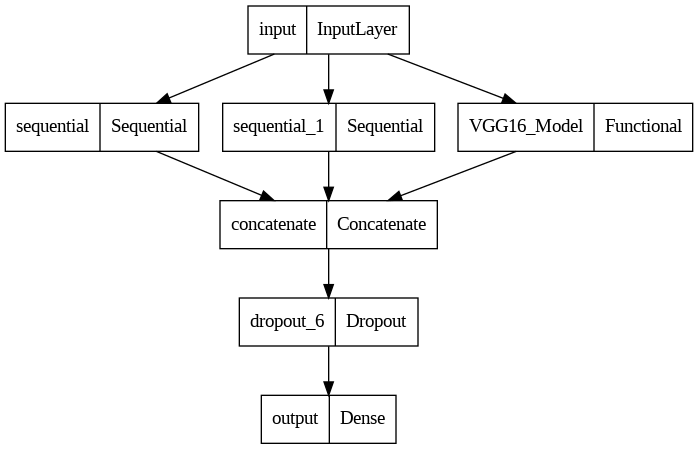

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(conc_model)

In [19]:
conc_model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy", metrics.Precision(name="precision"), metrics.Recall(name="recall")])
history = conc_model.fit(train,
                validation_data=val,
                epochs= 40, callbacks= es)

Epoch 1/40
160/160 [==============================] - 51s 265ms/step - loss: 0.6462 - accuracy: 0.5909 - precision: 0.6014 - recall: 0.5382 - val_loss: 0.5937 - val_accuracy: 0.5132 - val_precision: 0.9730 - val_recall: 0.0288
Epoch 2/40
160/160 [==============================] - 42s 260ms/step - loss: 0.6087 - accuracy: 0.6385 - precision: 0.6276 - recall: 0.6803 - val_loss: 0.5417 - val_accuracy: 0.9455 - val_precision: 0.9716 - val_recall: 0.9180
Epoch 3/40
160/160 [==============================] - 41s 258ms/step - loss: 0.5898 - accuracy: 0.6444 - precision: 0.6320 - recall: 0.6905 - val_loss: 0.5201 - val_accuracy: 0.9424 - val_precision: 0.9758 - val_recall: 0.9074
Epoch 4/40
160/160 [==============================] - 42s 260ms/step - loss: 0.5722 - accuracy: 0.6533 - precision: 0.6449 - recall: 0.6820 - val_loss: 0.5010 - val_accuracy: 0.9558 - val_precision: 0.9567 - val_recall: 0.9550
Epoch 5/40
160/160 [==============================] - 42s 260ms/step - loss: 0.5648 - accura

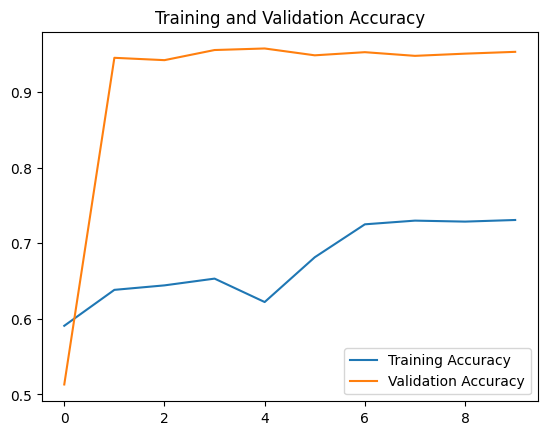

In [20]:
history = pd.DataFrame(history.history)

plt.plot(range(len(history)), history["accuracy"], label="Training Accuracy")
plt.plot(range(len(history)), history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()

In [21]:
conc_model.evaluate(test, return_dict=True)

40/40 [==============================] - 3s 62ms/step - loss: 0.4904 - accuracy: 0.9561 - precision: 0.9574 - recall: 0.9548


{'loss': 0.4904259145259857,
 'accuracy': 0.9561499953269958,
 'precision': 0.9573849439620972,
 'recall': 0.954800009727478}

In [22]:
conc_model.evaluate(train, return_dict=True)

160/160 [==============================] - 10s 62ms/step - loss: 0.4800 - accuracy: 0.9769 - precision: 0.9769 - recall: 0.9768


{'loss': 0.4800218343734741,
 'accuracy': 0.9768624901771545,
 'precision': 0.9768896102905273,
 'recall': 0.9768162965774536}

In [23]:
classes = train.class_names
classes

['FAKE', 'REAL']

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
preds = conc_model.predict(test)
preds

40/40 [==============================] - 3s 59ms/step


array([[0.69083744],
       [0.43115968],
       [0.6908394 ],
       ...,
       [0.6824795 ],
       [0.6040329 ],
       [0.43115968]], dtype=float32)

In [25]:
test_predictions = np.array([])
test_check = np.array([])
for x, y in test:
    test_predictions = np.append(test_predictions, conc_model(x) > 0.5)
    test_check = np.append(test_check, y)
confusion_matrix(test_check, test_predictions)

array([[9575,  425],
       [ 452, 9548]])

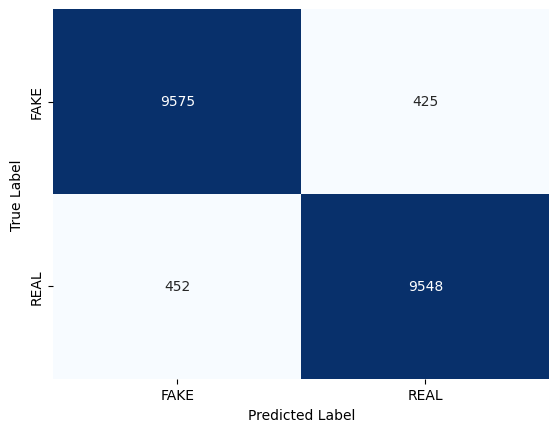

In [26]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(test_check, test_predictions), annot=True, fmt='.0f', cmap='Blues', xticklabels=classes, yticklabels=classes,
                  cbar=False)
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()